In [14]:
#Import libraries

#data manipulation
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 

# Machine learning 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [15]:
# Load the dataset

#Load Iris Dataset fromscikit-learn 
iris = load_iris()

# create a dataFrame from the dataset
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

# Add target variable to the DataFrame 
iris_df['target'] = iris.target

# Display the first few rows of the dataset 
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [16]:
# step 3: Explore the Data 

# display basic information about the dataset 
print('Dataset Information')
print(iris_df.info())

# Display summary statistics 
print('\nSummary Statistics:')
print(iris_df.describe())

#Check for any missing values
print('\nMissing Values:')
print(iris_df.isnull().sum())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%      

<function matplotlib.pyplot.show(close=None, block=None)>

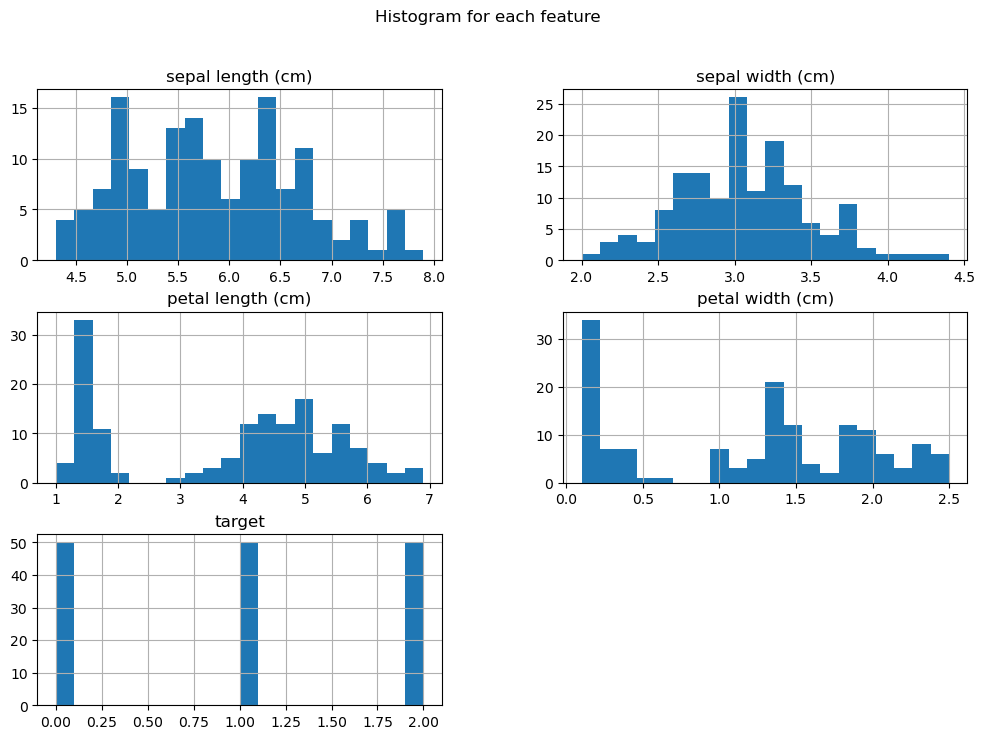

In [17]:
# Step 4 Visualise the Data 

# Histogram for each feature 
iris_df.hist(bins=20, figsize=(12,8))
plt.suptitle('Histogram for each feature')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

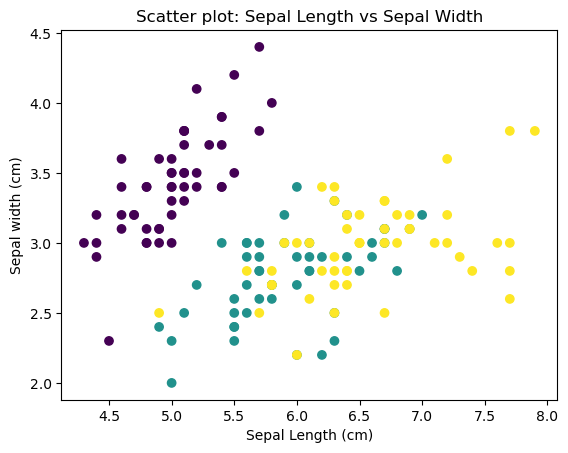

In [18]:
# Scatter plot for sepal length vs sepal width 
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatter plot: Sepal Length vs Sepal Width')
plt.show

In [19]:
# Preprocess the Data 

# Assuming no missing values, proceed with ecoding categorical variable and spllitting the data

# Encode categorical variable if needed
# In this case, 'target' is already numerical so encoding isnt necessary 

# Split the data into features (x) and target variable (y) 
x = iris_df.drop('target', axis=1)
y = iris_df['target']  # Target variable(output)
 
# Display the first few rows of features (x) and target variable (y)
print('\nFeatures (x):')
print(x.head())

print('\nTarget Variable (y):')
print(y.head())


Features (x):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target Variable (y):
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [20]:
# step 6: Split the data into Training and testing sets 
#Split the data into training and testing sets(80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print('\n Shape of Training features (x_train):', x_train.shape)
print('Shape of Testing Features (x_test):', x_test.shape)
print('Shape of Training Target(y_train):', y_train.shape)
print('Shape of Testing Target(y_test):', y_test.shape)


 Shape of Training features (x_train): (120, 4)
Shape of Testing Features (x_test): (30, 4)
Shape of Training Target(y_train): (120,)
Shape of Testing Target(y_test): (30,)


In [21]:
# Import the DecisionTreeClassifier 
# Create an instance of the DecisionTreeClassifier 
model = DecisionTreeClassifier(random_state=42)

# Display the model parameters(optional)
print('\nModel Parameters:')
print(model.get_params())


Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [22]:
# step 8: Train the Moddel 

#Train the DecisionTreeClassifier on the training data 
model.fit(x_train, y_train)

print('\nModel Trained successfully.')



Model Trained successfully.


In [23]:
# Step 9: Make Predictions 
# Use the trained model to make predictions on the testing data

y_pred = model.predict(x_test)

# Display the first few predictions
print('\nPredictions on Testing Data:')
print(y_pred[:5])


Predictions on Testing Data:
[1 0 2 1 1]


In [24]:
# step 10: Evaluate the model 

# Import the accuracy_score function 
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy 
print('\nModel Accuracy on Testing Data:', accuracy)


Model Accuracy on Testing Data: 1.0


In [25]:
# step 11: Fine Tune the Model 

# Import GridSearchCV for hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a DecisionTreeClassifier 
model_tuned =DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparemeter tuning 
grid_search = GridSearchCV(estimator=model_tuned, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print('\nBest Hyperparameters:')
print(best_params)

# Use the best model for predictions 
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)

# Calculate the accuracy of the tuned parameter 
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print('\nTuned model Accuracy on Testing Data:', accuracy_tuned)


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Tuned model Accuracy on Testing Data: 1.0


In [26]:
# Step 12: Save the Trained Model 

# Import joblib
import joblib

# Define the filename for the saved model 
model_filename = 'iris_decision_tree_model.joblib'

#Save the trained model to a file
joblib.dump(best_model, model_filename)

print('\nTrained model saved successfully.')



Trained model saved successfully.
